 ## Análise Exploratória

 #### Questões a serem respondidas:
 
1. Quantos registros válidos há e qual o total de aprovados e reprovados?
2. Qual a faixa etária com maior média de aprovação de crédito?
3. Quais a principais caracteristicas dos grupos de crédito (aprovado, reprovado)?
4. Percentil da renda entre os grupos de crédito (aprovado, reprovado)?
5. Ter carteira de motorista influencia na liberação de crédito?
6. Qual a relação  de creditos aprovados e reprovados entre os diferentes tipos de Cidadania?
7. Entre pessoas com menos de 1 ano empregadas, qual a relação entre pessoas que tirevam creditos aprovados e reprovados?
8. qual a média de score entre os creditos aprovados e reprovados?

In [268]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

sns.set_theme(style = "whitegrid")
name_file = 'dataset.csv'

### Funções

In [269]:
def getDataFrame():
    if os.path.isfile(name_file):
        return pd.read_csv(name_file)
    else:
        raise TypeError('Arquivo não encontrado!')

def generate_graphic_1(self):
    results = [self.count_approved, self.count_rejected]
    labels = ["Aprovados {} ({:0.2f} %)".format(self.count_approved, self.percent_approved), "Reprovados {} ({:0.2f} %)".format(self.count_rejected, self.percent_rejected)]
    plt.figure()
    plt.pie(results, labeldistance=1, radius=3, wedgeprops=dict(width=0.8))
    plt.legend(labels=labels, loc='center', prop={'size':12})
    plt.title("Total por Resultado", loc='Center', fontdict={'fontsize':20, 'fontweight':20})
    plt.show()

def generate_range_age(df):
    ranges = [0, 18, 27, 35, 42, 60, 80, 110]
    labels = [
        'Underage',
        'from 18 to 27',
        'from 28 to 35',
        'from 36 to 42',
        'from 43 to 60',
        'from 61 to 80',
        'from 81 to 110'
    ]
    df_age = pd.DataFrame()
    df_age = pd.cut(x=df, bins=ranges, labels=labels)
    return df_age

def generate_range_years_emp(df):
    ranges = [0, 1, 3, 5, 10, 15, 25, 100]
    labels = [
        'Less than a year',
        'from 1 to 3',
        'from 4 to 5',
        'from 6 to 10',
        'from 10 to 15',
        'from 16 to 25',
        'More than a 25 years'
    ]
    df_years_emp = pd.DataFrame()
    df_years_emp = pd.cut(x=df, bins=ranges, labels=labels)
    return df_years_emp

def generate_range_income(df):
    values = list(df.unique())
    values.sort(reverse=False)
    ranges = [-1, 1000, 2500, 4000, 7000, 12000, 20000, 100000]
    labels = [
        'Less than a minimum wage',
        'from 1001 to 2500',
        'from 2501 to 4000',
        'from 4001 to 7000',
        'from 7001 to 12000',
        'from 12001 to 20000',
        'More than a 20000'
    ]
    df_income = pd.DataFrame()
    df_income = pd.cut(x=df, bins=ranges, labels=labels)
    df_income = df
    return df_income

def run_etl_df(df):
    df = df.drop(columns=['Industry', 'Ethnicity', 'PriorDefault', 'Citizen', 'ZipCode', 'Approved'])
    df['Gender'] = list(map(lambda x: "Female" if x == 0 else "Male", df['Gender']))
    df['Age'] = generate_range_age(df['Age'])
    df['Debt'] = list(map(lambda x: True if x > 0 else False, df['Debt']))
    df['Married'] = list(map(lambda x: True if x == 1 else False, df['Married']))
    df['BankCustomer'] = list(map(lambda x: True if x == 1 else False, df['BankCustomer']))
    df['Employed'] = list(map(lambda x: True if x == 1 else False, df['Employed']))
    df['DriversLicense'] = list(map(lambda x: True if x == 1 else False, df['DriversLicense']))
    df['YearsEmployed'] = generate_range_years_emp(df['YearsEmployed'])
    df['Income'] = generate_range_income(df['Income'])
    return df

### Classe Principal

Total: 690
Aprovados 307
Reprovados 383


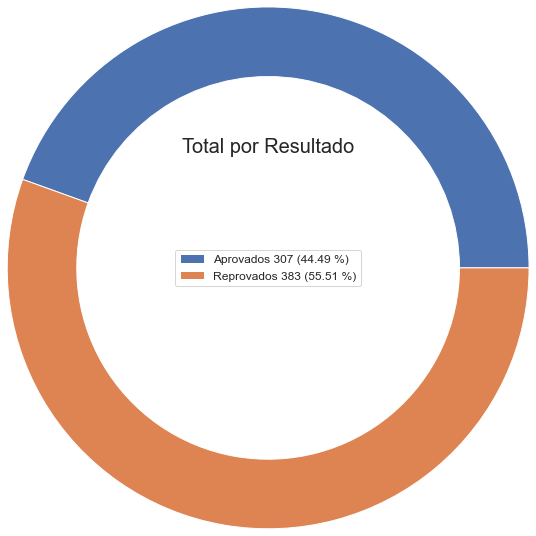

A idade com maior média de aprovação é de 33 anos.


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0
mean,0.680782,33.686221,5.904951,0.846906,0.853420,3.427899,0.925081,0.680782,4.605863,0.475570,161.208469,2038.859935,1.0
std,0.466935,12.774745,5.471485,0.360666,0.354264,4.120792,0.263690,0.466935,6.320242,0.500218,161.791065,7659.763941,0.0
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,23.210000,1.500000,1.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,30.170000,4.460000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,117.000000,221.000000,1.0
75%,1.000000,41.330000,9.520000,1.000000,1.000000,5.000000,1.000000,1.000000,7.000000,1.000000,277.000000,1209.000000,1.0
max,1.000000,76.750000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.000000,1.000000,840.000000,100000.000000,1.0


A idade com maior média de aprovação é de 33 anos.


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0
mean,0.680782,33.686221,5.904951,0.846906,0.853420,3.427899,0.925081,0.680782,4.605863,0.475570,161.208469,2038.859935,1.0
std,0.466935,12.774745,5.471485,0.360666,0.354264,4.120792,0.263690,0.466935,6.320242,0.500218,161.791065,7659.763941,0.0
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,23.210000,1.500000,1.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,30.170000,4.460000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,117.000000,221.000000,1.0
75%,1.000000,41.330000,9.520000,1.000000,1.000000,5.000000,1.000000,1.000000,7.000000,1.000000,277.000000,1209.000000,1.0
max,1.000000,76.750000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.000000,1.000000,840.000000,100000.000000,1.0


In [270]:
class Analyze:
    def __init__(self):
        self.df = getDataFrame()
        self.df_approved = self.df[self.df['Approved'] == 1]
        self.df_rejected = self.df[self.df['Approved'] == 0]


    def check_na(self):
        print("Possui valores vazios: {}".format(self.df.isnull().values.any()))

    def answer_1(self):
        self.count_total = len(self.df)
        self.count_approved = len(self.df_approved)
        self.count_rejected = len(self.df_rejected)
        self.percent_rejected = (self.count_rejected / self.count_total) * 100
        self.percent_approved = (self.count_approved / self.count_total) * 100
        print("Total: {}\nAprovados {}\nReprovados {}".format(self.count_total, self.count_approved, self.count_rejected))
        generate_graphic_1(self)

    def answer_2(self):
        self.mean_age_approved = self.df_approved['Age'].mean()
        print('A idade com maior média de aprovação é de {} anos.'.format(int(self.mean_age_approved)))
        display(self.df_approved.describe())

    def answer_3(self):
        print('avaliando os aprovados')
        df_approved = run_etl_df(self.df_approved.copy())
        df_rejected = run_etl_df(self.df_rejected.copy())
        
        print("Aprovados:")
        display(df_approved.head())
        print("Recusados:")
        display(df_rejected.head())
        # Criar graficos para detalhar

    def generate_answers(self):
        self.answer_1()
        self.answer_2()
        self.answer_2()


analyze = Analyze()
analyze.generate_answers()

#### Test Units

In [271]:
from nose.tools import assert_raises

class TestUnits(object):

    def test_file_exist(self):
        analyze = Analyze()
        not assert_raises(TypeError, analyze)
        print('TEST - test_file_exist: OK!')

    def test_file_not_exist(self):
        analyze = Analyze()
        assert_raises(TypeError, analyze)
        print('TEST - test_file_not_exist: OK!')

def runTestUnits():
    test = TestUnits()
    test.test_file_exist()
    test.test_file_not_exist()

#### Main

TEST - test_file_exist: OK!
TEST - test_file_not_exist: OK!
Possui valores vazios: False
Total: 690
Aprovados 307
Reprovados 383


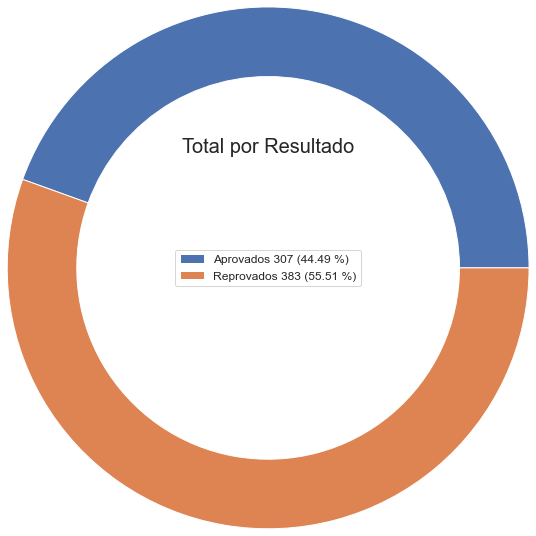

A idade com maior média de aprovação é de 33 anos.


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0
mean,0.680782,33.686221,5.904951,0.846906,0.853420,3.427899,0.925081,0.680782,4.605863,0.475570,161.208469,2038.859935,1.0
std,0.466935,12.774745,5.471485,0.360666,0.354264,4.120792,0.263690,0.466935,6.320242,0.500218,161.791065,7659.763941,0.0
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,23.210000,1.500000,1.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,30.170000,4.460000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,117.000000,221.000000,1.0
75%,1.000000,41.330000,9.520000,1.000000,1.000000,5.000000,1.000000,1.000000,7.000000,1.000000,277.000000,1209.000000,1.0
max,1.000000,76.750000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.000000,1.000000,840.000000,100000.000000,1.0


A idade com maior média de aprovação é de 33 anos.


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0
mean,0.680782,33.686221,5.904951,0.846906,0.853420,3.427899,0.925081,0.680782,4.605863,0.475570,161.208469,2038.859935,1.0
std,0.466935,12.774745,5.471485,0.360666,0.354264,4.120792,0.263690,0.466935,6.320242,0.500218,161.791065,7659.763941,0.0
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,23.210000,1.500000,1.000000,1.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.000000,30.170000,4.460000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,117.000000,221.000000,1.0
75%,1.000000,41.330000,9.520000,1.000000,1.000000,5.000000,1.000000,1.000000,7.000000,1.000000,277.000000,1209.000000,1.0
max,1.000000,76.750000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.000000,1.000000,840.000000,100000.000000,1.0


In [272]:
def main():
    runTestUnits()
    analyze = Analyze()
    analyze.check_na()
    analyze.generate_answers()
    

if __name__ == '__main__':
    main()

In [273]:
#df_full = pd.read_csv("dataset.csv")
#df = df_full.copy()

In [274]:
#df.head()

In [275]:
#df = df.drop(columns=["Ethnicity"])

In [276]:
#df['Citizen'].unique()

In [277]:
#Altera label da coluna Industry
#citizen_map = {'ByBirth':0, 'ByOtherMeans':1, 'Temporary':2}

In [278]:
#df['Citizen'] = df['Citizen'].map(citizen_map)
#df['Citizen']

In [279]:
#df.head()

In [280]:
#Altera label da coluna Industry
#label_names = df['Industry'].unique()
#index_labels = list(range(len(label_names)))
#df['Industry'] = df['Industry'].map(dict(zip(label_names, index_labels)))
#df['Industry']
